In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing a dataset using pandas

In [2]:
white_wine_df = pd.read_csv("winequality-white.csv", sep=";")

white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### <center> Descriptive Statistics </center>

In [4]:
white_wine_df.describe().T #Some descriptive 

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


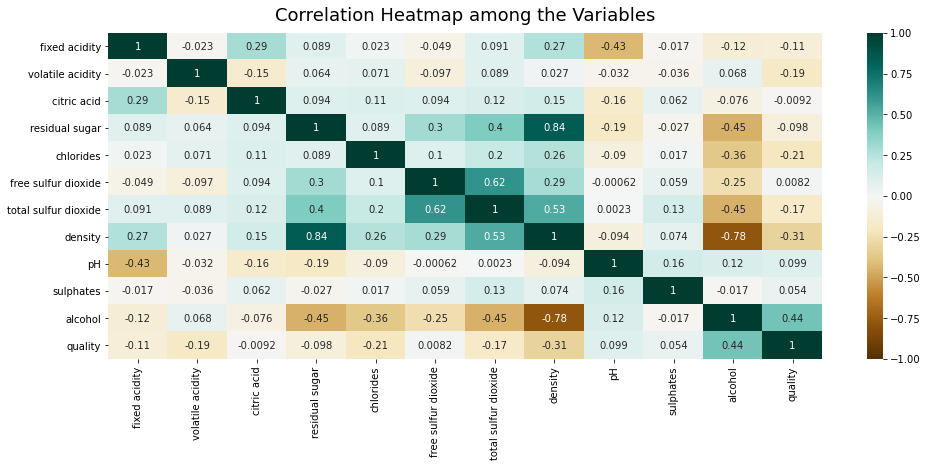

In [5]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(white_wine_df.corr(), annot=True, cmap='BrBG',vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap among the Variables', fontdict={'fontsize':18}, pad=12)
plt.show()

In [6]:
X = white_wine_df.drop("quality",axis = 1)
y = white_wine_df["quality"]

from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF["Features"] = X.columns

VIF["VIF_value"] = [variance_inflation_factor(X.values , i) for i in range(len(X.columns))]
VIF


,Features,VIF_value
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


There is Multicollinerity among the Explanatory variables

### Computing Some LDA and PCA

Normally, for supervised dataset we use LDA however, most algorithms use the results from PCA and apply LDA

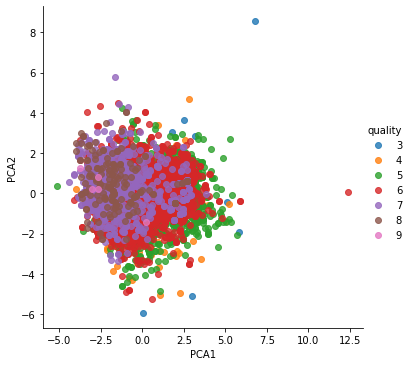

In [10]:
from sklearn.decomposition import PCA #Class Model
from sklearn.preprocessing import StandardScaler

model = PCA(n_components=2) #Hyperparameter Class( 2D )

#Scaling before PCA
df_copy = white_wine_df.copy()
scaler = StandardScaler()


#Prediction/Transforming
#Feature enginnering >>>scaler.fit_transform(df_copy)
X2_D = model.fit_transform(scaler.fit_transform(df_copy)) #2D dimentional PCA1 and PCA2


#plotting
#Copying the data to avoid modifying the original Dataset
df_copy["PCA1"] = X2_D[:,0] 
df_copy["PCA2"] = X2_D[:,1]
sns.lmplot("PCA1", "PCA2", hue = "quality", data=df_copy, fit_reg=False)



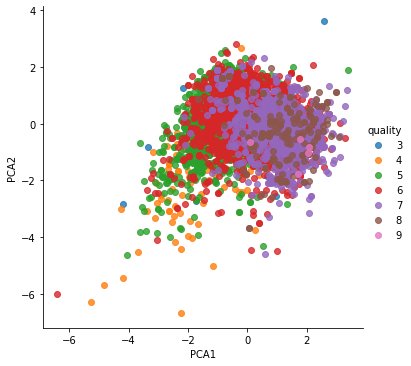

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #Class Model
model = LDA(n_components=2)#Hyperparameters
#Data preparation
features = white_wine_df.drop(("quality"), 1)
response = white_wine_df["quality"]
df_copy_LDA = white_wine_df
X2_D = model.fit_transform(X= features, y= response) #2D 
df_copy_LDA["PCA1"] = X2_D[:,0] 
df_copy_LDA["PCA2"] = X2_D[:,1]
sns.lmplot("PCA1", "PCA2", hue = "quality", data=df_copy_LDA, fit_reg=False)